<a href="https://colab.research.google.com/github/olgOk/XanaduTraining/blob/master/Xanadu3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pennylane

In [2]:
pip install torch

In [3]:
pip install tensorflow

In [4]:
pip install sklearn

In [5]:
pip install pennylane-qiskit

In [6]:
import pennylane as qml
from pennylane import numpy as np

In [25]:
dev = qml.device("default.qubit", wires=2)
@qml.qnode(device=dev)
def cos_func(x, w):
  qml.RX(x, wires=0)
  qml.templates.BasicEntanglerLayers(w, wires=range(2))
  return qml.expval(qml.PauliZ(0))

layer = 4
weights = qml.init.basic_entangler_layers_uniform(layer, 2)

xs = np.linspace(-np.pi, 4*np.pi, requires_grad=False)
ys = np.cos(xs)

In [26]:
opt = qml.AdamOptimizer()
epochs = 10

for epoch in range(epochs):
  for x, y in zip(xs, ys):
    cost = lambda weights:(cos_func(x, weights) - y) ** 2
    weights = opt.step(cost, weights)

ys_trained = [cos_func(x, weights) for x in xs]


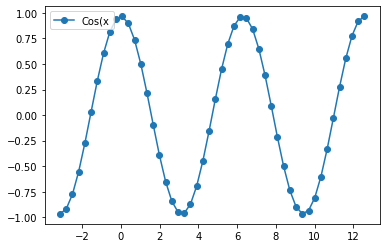

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(xs, ys_trained, marker="o", label="Cos(x")
plt.legend()
plt.show()

## Preparing GHZ state

Using the Autograd interface, train a circuit to prepare the 3-qubit W state:

$|W> = {1/sqrt(3)}(001|> + |010> + |100>)

In [28]:
qubits = 3

w = np.array([0, 1, 1, 0, 1, 0, 0, 0]) / np.sqrt(3)
w_projector = w[:, np.newaxis] * w
w_decomp = qml.utils.decompose_hamiltonian(w_projector)
H = qml.Hamiltonian(*w_decomp)

def prepare_w(weights, wires):
    qml.templates.StronglyEntanglingLayers(weights, wires=wires)

dev = qml.device("default.qubit", wires=qubits)
qnodes = qml.map(prepare_w, H.ops, dev)
w_overlap = qml.dot(H.coeffs, qnodes)

layers = 4
weights = qml.init.strong_ent_layers_uniform(layers, qubits)

opt = qml.RMSPropOptimizer()

epochs = 50

for i in range(epochs):
    weights = opt.step(lambda weights: -w_overlap(weights), weights)
    if i % 5 == 0:
        print(i, w_overlap(weights))

output_overlap = w_overlap(weights)
output_state = np.round(dev.state, 3)


AttributeError: ignored

##Quantum-based Optimization

In [30]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def rotation(thetas):
    qml.RX(1, wires=0)
    qml.RZ(1, wires=0)
    
    qml.RX(thetas[0], wires=0)
    qml.RY(thetas[1], wires=0)

    return qml.expval(qml.PauliZ(0))


In [ ]:
opt = qml.RotoselectOptimizer()



In [31]:
import sklearn.datasets

data = sklearn.datasets.load_iris()
x = data["data"]
y = data["target"]

np.random.seed(1967)
x, y = zip(*np.random.permutation(list(zip(x, y))))

split = 125

x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]
